# Desafio Russo - Dead Babies

by Thiago Russo:
> Os times de quarta e sexta preparam o seguinte dever de casa para me apresentar (objetivos: praticar criar massa de teste, praticar relatorio no Viya, aprender a colocar um parametro para filtrar um relatorio no Viya)
1. Com base no slide de "Mães fumantes geram filhos mais saudáveis!"
2. Criar uma base de dados de teste com no minimo os seguintes campos: id, tipo da mae (fumante / nao fumante), peso do bebe, indicador de morte
3. Os dados devem respeitar os numeros mostrados no slide, ou seja 700 observacoes no total
4. Com base na variavel continua peso do bebe, criar uma categoria para montar a matriz mostrada nos slides
5. Tentar criar um parametro (peso ponto de corte) para montar uma categoria dinamica e brincarmos e mudar o ponto de corte e ver o comportamento da distribuicao
6. Sugiro criar a massa de dados no excel, pq vou querer auditar como foi criada a amostra. Mas pode ser em outro lugar, desde que vcs consigam explicar a logica de criacao dos dados.
7. Apresentacao quando vcs acharem que estiver bom, ou na proxima aula de quarta e sexta

<br>
<img src="img/example.png" width="400" height="200">

In [1]:
import pandas as pd
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data_length = 700
data = {"id": [x for x in range(data_length)]}
df = pd.DataFrame(data)
print(df.head())

   id
0   0
1   1
2   2
3   3
4   4


In [3]:
df['smoking_mother'] = random.choices([0,1], k=data_length)
print(df.head())
print('\nNúmero de mães fumantes: ',df['smoking_mother'].sum())
print('Número de mães não fumantes: ',data_length - df['smoking_mother'].sum())

   id  smoking_mother
0   0               1
1   1               1
2   2               0
3   3               1
4   4               0

Número de mães fumantes:  361
Número de mães não fumantes:  339


In [4]:
df['baby_weight'] = random.choices(range(2000,4000), k=data_length)
print(df.head())

   id  smoking_mother  baby_weight
0   0               1         3319
1   1               1         2218
2   2               0         3870
3   3               1         2230
4   4               0         2556


In [5]:
df['dead_baby'] = random.choices([0,1], [8,2], k=data_length)
print(df.head())
print('\nMortalidade infantil: ',df['dead_baby'].sum())

   id  smoking_mother  baby_weight  dead_baby
0   0               1         3319          1
1   1               1         2218          0
2   2               0         3870          0
3   3               1         2230          0
4   4               0         2556          0

Mortalidade infantil:  151


In [6]:
df['categorical_weight'] = ''
weight_cut_point = (df['baby_weight'].mean() - df['baby_weight'].std()) # Ponto de 
df.loc[df['baby_weight']<= weight_cut_point, ['categorical_weight']] = 'Abaixo do peso'
df.loc[df['baby_weight']> weight_cut_point, ['categorical_weight']] = 'Acima do peso'
print(df.head())
print(df.groupby('categorical_weight')['id'].count())

   id  smoking_mother  baby_weight  dead_baby categorical_weight
0   0               1         3319          1      Acima do peso
1   1               1         2218          0     Abaixo do peso
2   2               0         3870          0      Acima do peso
3   3               1         2230          0     Abaixo do peso
4   4               0         2556          0      Acima do peso
categorical_weight
Abaixo do peso    139
Acima do peso     561
Name: id, dtype: int64


In [7]:
df1 = df
df1['categorical_weight'] = pd.cut(df['baby_weight'], bins=2, labels=['Abaixo do peso','Acima do peso'])
print(df1.head(), '\n')
print(df1['categorical_weight'].value_counts())

   id  smoking_mother  baby_weight  dead_baby categorical_weight
0   0               1         3319          1      Acima do peso
1   1               1         2218          0     Abaixo do peso
2   2               0         3870          0      Acima do peso
3   3               1         2230          0     Abaixo do peso
4   4               0         2556          0     Abaixo do peso 

Acima do peso     355
Abaixo do peso    345
Name: categorical_weight, dtype: int64


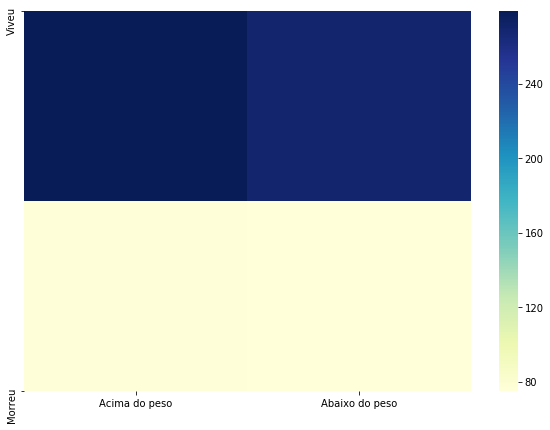

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

df1['categorical_weight_bin'] = ''
df1.loc[df1['categorical_weight'] == 'Acima do peso',['categorical_weight_bin']] = 0
df1.loc[df1['categorical_weight'] == 'Abaixo do peso',['categorical_weight_bin']] = 1
cm = confusion_matrix(df1['dead_baby'],df1['categorical_weight_bin'])

df_cm = pd.DataFrame(cm, index=['Viveu','Morreu'], columns=['Acima do peso','Abaixo do peso'])
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, cmap="YlGnBu")
plt.show()

In [10]:
df1.to_excel("dead_babies.xlsx")